<a href="https://colab.research.google.com/github/KAVINESH23/Topic-Modelling/blob/main/Topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt
urls = [
    "https://thehackernews.com/2024/07/spanish-hackers-bundle-phishing-kits.html",
    "https://thehackernews.com/2024/07/french-authorities-launch-operation-to.html",
    "https://thehackernews.com/2024/07/how-searchable-encryption-changes-data.html",
    "https://thehackernews.com/2024/07/stargazer-goblin-creates-3000-fake.html"
]
def fetch_url(url):
    # Send an HTTP request to fetch the page content
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    # Find the relevant content (e.g., paragraphs)
    paragraphs = soup.find_all("p")
    return [p.get_text() for p in paragraphs]
  # Fetch and combine text data from all URLs
all_text_data = []
for url in urls:
    all_text_data.extend(fetch_url(url))

# Create a Pandas DataFrame
df = pd.DataFrame({"Text": all_text_data})

# Print the DataFrame
print(df)
df.to_json("Cybercrime.json")


                                                  Text
0    A Spanish-speaking cybercrime group named GXC ...
1    Singaporean cybersecurity company Group-IB, wh...
2    The phishing kit is priced anywhere between $1...
3    Targets of the campaign include users of Spani...
4    Also part of the spectrum of services offered ...
..                                                 ...
101  "The average user views the separation of priv...
102  "Unfortunately, [...] that is not always true....
103  Watch as experts simulate real-world threats t...
104  Get actionable steps and tools to harness the ...
105  Get the latest news, expert insights, exclusiv...

[106 rows x 1 columns]


In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
import nltk
from nltk.corpus import stopwords

#Vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def load_data(file):
  with open(file,"r",encoding="utf-8") as f:
    data=json.load(f)
  return(data)

def write_data(file,data):
  with open(file,"w",encoding="utf-8") as f:
    json.dump(data,f,indent=4)

In [ ]:
nltk.download("stopwords")
print(stopwords)

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data=load_data("/content/Cybercrime.json")["Text"]
splited_data=[]
for i in data:
  df=data[i].split()
  splited_data.append(df)
data = [item for sublist in splited_data for item in sublist]
data

['A',
 'Spanish-speaking',
 'cybercrime',
 'group',
 'named',
 'GXC',
 'Team',
 'has',
 'been',
 'observed',
 'bundling',
 'phishing',
 'kits',
 'with',
 'malicious',
 'Android',
 'applications,',
 'taking',
 'malware-as-a-service',
 '(MaaS)',
 'offerings',
 'to',
 'the',
 'next',
 'level.',
 'Singaporean',
 'cybersecurity',
 'company',
 'Group-IB,',
 'which',
 'has',
 'been',
 'tracking',
 'the',
 'e-crime',
 'actor',
 'since',
 'January',
 '2023,',
 'described',
 'the',
 'crimeware',
 'solution',
 'as',
 'a',
 '"sophisticated',
 'AI-powered',
 'phishing-as-a-service',
 'platform"',
 'capable',
 'of',
 'targeting',
 'users',
 'of',
 'more',
 'than',
 '36',
 'Spanish',
 'banks,',
 'governmental',
 'bodies,',
 'and',
 '30',
 'institutions',
 'worldwide.',
 'The',
 'phishing',
 'kit',
 'is',
 'priced',
 'anywhere',
 'between',
 '$150',
 'and',
 '$900',
 'a',
 'month,',
 'whereas',
 'the',
 'bundle',
 'including',
 'the',
 'phishing',
 'kit',
 'and',
 'Android',
 'malware',
 'is',
 'avail

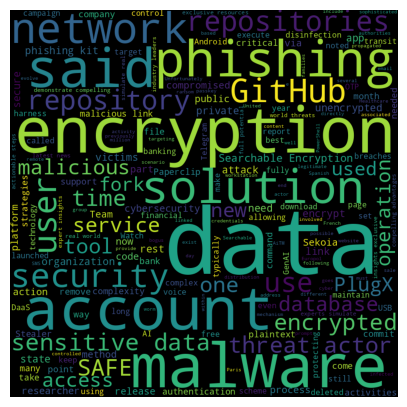

In [ ]:

# Join the list of words into a single string
text = " ".join(data)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(5, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:
def lemmatization(texts,allowed_postages=["NOUN","ADJ","VERB","ADV"]):
  nlp=spacy.load("en_core_web_sm")
  texts_out=[]
  for text in texts:
    doc=nlp(text)
    new_text=[]
    for token in doc:
      if token.pos_ in allowed_postages:
        new_text.append(token.lemma_)
    final=" ".join(new_text)
    texts_out.append(final)
  return (texts_out)

lemmatized_texts=lemmatization(data)
lemmatized_texts

['',
 'spanish speak',
 '',
 'group',
 'name',
 'gxc',
 'team',
 'have',
 '',
 'observe',
 'bundle',
 'phishe',
 'kit',
 '',
 'malicious',
 'android',
 'application',
 'take',
 'malware service',
 '',
 'offering',
 '',
 '',
 'next',
 'level',
 'singaporean',
 'cybersecurity',
 'company',
 '',
 '',
 'have',
 '',
 'track',
 '',
 '- crime',
 'actor',
 '',
 '',
 '',
 'describe',
 '',
 'crimeware',
 'solution',
 '',
 '',
 'sophisticated',
 'power',
 'phishe service',
 'platform',
 'capable',
 '',
 'target',
 'user',
 '',
 'more',
 '',
 '',
 'spanish',
 'bank',
 'governmental',
 'body',
 '',
 '',
 'institution',
 'worldwide',
 '',
 'phishe',
 '',
 '',
 'price',
 'anywhere',
 '',
 '',
 '',
 '',
 '',
 'month',
 '',
 '',
 'bundle',
 'include',
 '',
 'phishe',
 '',
 '',
 'android',
 '',
 '',
 'available',
 '',
 '',
 'subscription',
 'basis',
 '',
 'about',
 '',
 '',
 'month',
 'target',
 '',
 '',
 'campaign',
 'include',
 'user',
 '',
 'spanish',
 'financial',
 'institution',
 '',
 '',
 '',
 'ta

In [ ]:
def gen_words(texts):
  final=[]
  for text in texts:
    new=gensim.utils.simple_preprocess(text,deacc=True)
    final.append(new)
  return(final)

data_words=gen_words(lemmatized_texts)
print(data_words)

[[], ['spanish', 'speak'], [], ['group'], ['name'], ['gxc'], ['team'], ['have'], [], ['observe'], ['bundle'], ['phishe'], ['kit'], [], ['malicious'], ['android'], ['application'], ['take'], ['malware', 'service'], [], ['offering'], [], [], ['next'], ['level'], ['singaporean'], ['cybersecurity'], ['company'], [], [], ['have'], [], ['track'], [], ['crime'], ['actor'], [], [], [], ['describe'], [], ['crimeware'], ['solution'], [], [], ['sophisticated'], ['power'], ['phishe', 'service'], ['platform'], ['capable'], [], ['target'], ['user'], [], ['more'], [], [], ['spanish'], ['bank'], ['governmental'], ['body'], [], [], ['institution'], ['worldwide'], [], ['phishe'], [], [], ['price'], ['anywhere'], [], [], [], [], [], ['month'], [], [], ['bundle'], ['include'], [], ['phishe'], [], [], ['android'], [], [], ['available'], [], [], ['subscription'], ['basis'], [], ['about'], [], [], ['month'], ['target'], [], [], ['campaign'], ['include'], ['user'], [], ['spanish'], ['financial'], ['institutio

In [ ]:
id2word=corpora.Dictionary(data_words)
corpus=[]
for text in data_words:
  new = id2word.doc2bow(text)
  corpus.append(new)

print(corpus)

[[], [(0, 1), (1, 1)], [], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [], [(7, 1)], [(8, 1)], [(9, 1)], [(10, 1)], [], [(11, 1)], [(12, 1)], [(13, 1)], [(14, 1)], [(15, 1), (16, 1)], [], [(17, 1)], [], [], [(18, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(22, 1)], [], [], [(6, 1)], [], [(23, 1)], [], [(24, 1)], [(25, 1)], [], [], [], [(26, 1)], [], [(27, 1)], [(28, 1)], [], [], [(29, 1)], [(30, 1)], [(9, 1), (16, 1)], [(31, 1)], [(32, 1)], [], [(33, 1)], [(34, 1)], [], [(35, 1)], [], [], [(0, 1)], [(36, 1)], [(37, 1)], [(38, 1)], [], [], [(39, 1)], [(40, 1)], [], [(9, 1)], [], [], [(41, 1)], [(42, 1)], [], [], [], [], [], [(43, 1)], [], [], [(8, 1)], [(44, 1)], [], [(9, 1)], [], [], [(12, 1)], [], [], [(45, 1)], [], [], [(46, 1)], [(47, 1)], [], [(48, 1)], [], [], [(43, 1)], [(33, 1)], [], [], [(49, 1)], [(44, 1)], [(34, 1)], [], [(0, 1)], [(50, 1)], [(39, 1)], [], [], [], [(51, 1)], [], [(37, 1)], [(16, 1)], [(52, 1)], [(36, 1)], [], [(53, 1)], [(54, 1)], [], [], [], [(55, 1)], [],

In [ ]:
lda_model= gensim.models.LdaModel(corpus=corpus,id2word=id2word,num_topics=10,random_state=10,update_every=1,chunksize=100,passes=10,alpha="auto")
pyLDAvis.enable_notebook()
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

vis=pyLDAvis.gensim.prepare(lda_model,corpus,id2word,mds="mmds",R=30)
vis

Topic: 0 
Words: 0.022*"observe" + 0.007*"power" + 0.001*"vulnerability" + 0.001*"boundary" + 0.001*"intentional" + 0.001*"documentation" + 0.001*"average" + 0.001*"separation" + 0.001*"true" + 0.001*"actually"


Topic: 1 
Words: 0.092*"solution" + 0.003*"month" + 0.003*"bank" + 0.001*"vulnerability" + 0.001*"separation" + 0.001*"destruction" + 0.001*"intentional" + 0.001*"average" + 0.001*"documentation" + 0.001*"imply"


Topic: 2 
Words: 0.067*"platform" + 0.001*"vulnerability" + 0.001*"actually" + 0.001*"intentional" + 0.001*"documentation" + 0.001*"average" + 0.001*"separation" + 0.001*"boundary" + 0.001*"understandably" + 0.001*"see"


Topic: 3 
Words: 0.066*"target" + 0.002*"worldwide" + 0.001*"vulnerability" + 0.001*"boundary" + 0.001*"intentional" + 0.001*"documentation" + 0.001*"average" + 0.001*"separation" + 0.001*"actually" + 0.001*"see"


Topic: 4 
Words: 0.059*"company" + 0.001*"vulnerability" + 0.001*"boundary" + 0.001*"destruction" + 0.001*"imply" + 0.001*"intentional" 

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.174508  0.225430       1        1  86.570684
7      0.095940 -0.129816       2        1   3.093265
8      0.079652  0.063662       3        1   2.236688
5     -0.068809 -0.076752       4        1   1.421554
1     -0.019400 -0.008543       5        1   1.373885
6      0.027601  0.013148       6        1   1.177266
3      0.033137 -0.021646       7        1   1.083984
0      0.004035 -0.016201       8        1   1.018350
4      0.016444 -0.016025       9        1   1.016513
2      0.005907 -0.033257      10        1   1.007809, topic_info=            Term       Freq      Total Category  logprob  loglift
34          user  10.000000  10.000000  Default  30.0000  30.0000
101          use   6.000000   6.000000  Default  29.0000  29.0000
11     malicious   6.000000   6.000000  Default  28.0000  28.0000
504   encryption   7.000000   7.000000  Default  27.0000  27.0000
6           have   6.000000   6.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
910        worth   0.023769   0.938851  Topic10  -6.8973   0.9211
886          aim   0.023769   0.855569  Topic10  -6.8973   1.0140
887          job   0.023769   0.855569  Topic10  -6.8973   1.0140
888  opportunity   0.023769   0.855569  Topic10  -6.8973   1.0140
889    authorize   0.023769   0.855569  Topic10  -6.8973   1.0140

[576 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
922       1  0.971181          above
201       1  0.971860         access
907       1  1.065132     accessible
261       1  0.994944        account
918       1  0.971181            act
...     ...       ...            ...
34        2  0.964863           user
904       1  1.065132        visible
898       1  0.661241  vulnerability
905       1  1.065132           word
910       1  1.065132          worth

[93 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 9, 6, 2, 7, 4, 1, 5, 3])

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.7512134671030458
